# Question 6: Creating Figure 3b

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from pathlib import Path

# Small style adjustments for more readable plots
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 14
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec

import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

import warnings
warnings.simplefilter("ignore")  # filter some warning messages

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

In [8]:
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")

In [4]:
def nearest(lat, lon):

    abslat = np.abs(ds.lat - lat)
    abslon = np.abs(ds.lon - lon)

    distance2 = abslat**2 + abslon**2

    ([xloc, yloc]) = np.where(distance2 == np.min(distance2))
    lat = ds.lat.data[xloc]
    long = ds.lon.data[yloc]
    return lat, long


nlat, nlong = nearest(45, -124.061)
print(nlat, nlong)

[45.] [-124.08]


Newport's latitude is 45 deg N and longitude is 127 deg W

In [5]:
# newport data only
n45 = (ds.analysed_sst.sel(lat=nlat, lon=nlong) - 273).rolling(time=30, center=True).mean()

In [6]:
# 2002 - 2013 data
n45_sst_all = (n45.loc['2002-01-01':'2013-12-31']).groupby("time.dayofyear")

# avg, max, min, std, and upper and lower bounds
n45_sst_all_avg = n45_sst_all.mean()
n45_sst_all_max = n45_sst_all.max()
n45_sst_all_min = n45_sst_all.min()
n45_sst_all_std = n45_sst_all.std()
n45_sst_all_upper = n45_sst_all_avg + n45_sst_all_std
n45_sst_all_lower = n45_sst_all_avg - n45_sst_all_std

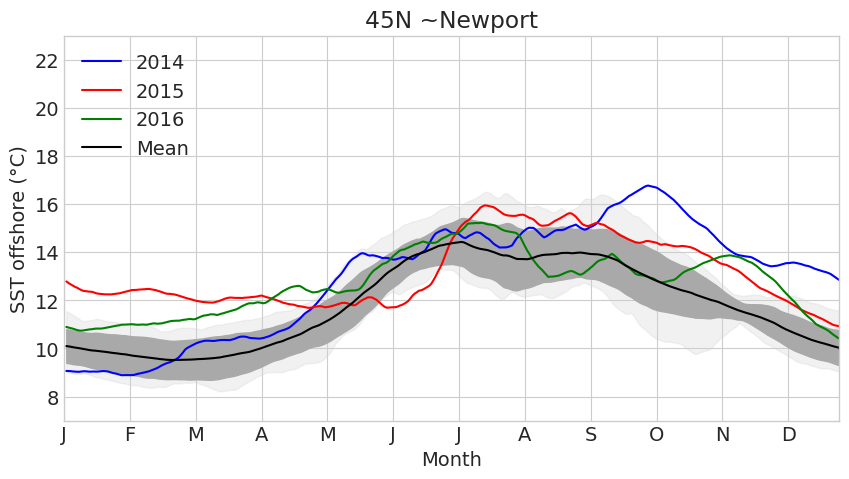

In [7]:
month_idx = np.array(range(1,366))
month_idx1 = np.array(range(1,367))
years_idx = n45_sst_all_avg.dayofyear.values

fig, ax = plt.subplots(figsize=(10, 5))

# plotting 2014 data
n45_sst_2014 = (n45.loc['2014-01-01':'2014-12-31']).groupby("time.dayofyear").mean()
l2014 = plt.plot(month_idx, n45_sst_2014[:,0,0], "blue", label="2014")

# plotting 2015 data
n45_sst_2015 = (n45.loc['2015-01-01':'2015-12-31']).groupby("time.dayofyear").mean()
l2015 = plt.plot(month_idx, n45_sst_2015[:,0,0], "red" , label="2015")

# plotting 2016 data
n45_sst_2016 = (n45.loc['2016-01-01':'2016-12-31']).groupby("time.dayofyear").mean()
l2016 = plt.plot(month_idx1, n45_sst_2016[:,0,0], "green", label="2016")

# plotting the mean
black_line = plt.plot(years_idx, n45_sst_all_avg[:,0,0], "black", label="Mean")

# plotting the min/max values for 2002-2013
plt.fill_between(years_idx, n45_sst_all_min[:,0,0], n45_sst_all_max[:,0,0], color="lightgray", alpha=0.3)

# plotting ±1 SD around the mean for 2002-2013
plt.fill_between(years_idx, n45_sst_all_upper[:,0,0], n45_sst_all_lower[:,0,0], color="darkgray")


# ax.set_xticks([13, 44, 75, 106, 137, 168, 199, 230, 261, 292, 323, 354])
plt.xticks(ticks=np.array(range(0, 365, 31)), labels=['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
plt.xlim(0, 365)
plt.ylim(7, 23)
plt.xlabel('Month')
plt.ylabel('SST offshore (°C)')
plt.title('45N ~Newport')
plt.legend(loc="upper left")
plt.show()